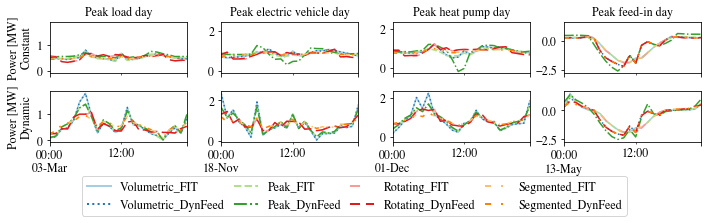

In [11]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.lines import Line2D
from matplotlib import rc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Setting LaTeX font
rc('font', **{'family': 'serif', 'serif': ['Times'], 'size': 12})
rc('text', usetex=False)

# File names
file_name_ref = \
    "00_pricing_constant_operation_constant_fi_fit_ne_volumetric_gridch_False.pkl"
files_name_constant = [
 '00_pricing_constant_operation_dynamic_fi_fit_ne_volumetric_gridch_False.pkl',
 '00_pricing_constant_operation_dynamic_fi_dynamic_ne_volumetric_gridch_False.pkl',
 '00_pricing_constant_operation_dynamic_fi_fit_ne_peak_gridch_False.pkl',
 '00_pricing_constant_operation_dynamic_fi_dynamic_ne_peak_gridch_False.pkl',
 '00_pricing_constant_operation_dynamic_fi_fit_ne_rotating_gridch_False.pkl',
 '00_pricing_constant_operation_dynamic_fi_dynamic_ne_rotating_gridch_False.pkl',
 '00_pricing_constant_operation_dynamic_fi_fit_ne_segmented_gridch_False.pkl',
 '00_pricing_constant_operation_dynamic_fi_dynamic_ne_segmented_gridch_False.pkl',]
files_name_dynamic = [
 '00_pricing_dynamic_operation_dynamic_fi_fit_ne_volumetric_gridch_False.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_volumetric_gridch_False.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_fit_ne_peak_gridch_False.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_peak_gridch_False.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_fit_ne_rotating_gridch_False.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_rotating_gridch_False.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_fit_ne_segmented_gridch_False.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_segmented_gridch_False.pkl',]
name_dict = {
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_peak_gridch_False.pkl': "Peak_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_rotating_gridch_False.pkl': "Rotating_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_segmented_gridch_False.pkl': "Segmented_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_volumetric_gridch_False.pkl': "Volumetric_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_peak_gridch_False.pkl': "Peak_FIT",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_rotating_gridch_False.pkl': "Rotating_FIT",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_segmented_gridch_False.pkl': "Segmented_FIT",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_volumetric_gridch_False.pkl': "Volumetric_FIT",
}

linestyles = ["solid", "dotted", "dashed", "dashdot", (0, (5, 10)), (5, (10, 3)),
              (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1))]

# Updated path to the exact folder
res_dir = r""
colors = sns.color_palette("Paired")
ts_dict = {
    "feed-in": pd.date_range(start="2019-05-13", periods=24, freq="1h"),
    "heat_pump": pd.date_range(start="2019-12-01", periods=24, freq="1h"),
    "load": pd.date_range(start="2019-03-03", periods=24, freq="1h"),
    "electric_vehicle": pd.date_range(start="2019-11-18", periods=24, freq="1h"),
    "debug": pd.date_range(start="2019-05-13", periods=24, freq="1h").append(
                    pd.date_range(start="2019-12-01", periods=24, freq="1h")).append(
                    pd.date_range(start="2019-03-03", periods=24, freq="1h")).append(
                    pd.date_range(start="2019-11-18", periods=24, freq="1h")),
    "full": pd.date_range(start="2019-01-01", periods=8760, freq="1h")
}

fig, axes = plt.subplots(2, 4, figsize=(10, 2.7))  # gridspec_kw={'width_ratios': [1.2, 1, 1, 1]}
axes_flat = [ax for ax in axes.flat]
tariff_idx = 0
for file_name_dynamic, file_name_constant in \
        zip(files_name_dynamic, files_name_constant):
    axes_idx = 0
    # add new time series
    ts_constant_orig = \
        pd.read_pickle(os.path.join(res_dir, file_name_constant)).divide(1000).sum(axis=1)
    ts_constant_orig.index = pd.date_range(start="2019-01-01", periods=8760, freq="1h")
    ts_dynamic_orig = \
        pd.read_pickle(os.path.join(res_dir, file_name_dynamic)).divide(1000).sum(axis=1)
    ts_dynamic_orig.index = pd.date_range(start="2019-01-01", periods=8760, freq="1h")

    for column_idx, mode in enumerate(["load", "electric_vehicle", "heat_pump", "feed-in"]):
        for row_idx, typ in enumerate(["constant", "dynamic"]):
            ax = axes[(row_idx, column_idx)]
            locals()[f"ts_{typ}_orig"][ts_dict[mode]].plot(ax=ax, color=colors[tariff_idx], linestyle=linestyles[tariff_idx])
            if row_idx == 0:
                ax.set_title("Peak " + mode.replace("_", " ") + " day",fontsize=12)
                ax.set_xticklabels([])
                ax.xaxis.set_minor_formatter("")
            ax.xaxis.set_minor_locator(MultipleLocator(12))
    tariff_idx += 1

for column_idx in range(len(axes[0])):
    if column_idx == 0:
        ax = axes[0, column_idx]
        ax.set_ylabel("Power [MW]\nConstant")
        ax = axes[1, column_idx]
        ax.set_ylabel("Power [MW]\nDynamic")
    ax = axes[1, column_idx]
    ylim1 = ax.get_ylim()
    ylim2 = axes[(0, column_idx)].get_ylim()
    ylim = (min(ylim1[0], ylim2[0]), max(ylim1[1], ylim2[1]))
    axes[(0, column_idx)].set_ylim(ylim)
    ax.set_ylim(ylim)

plt.tight_layout()

labels = []
for idx, tariff in enumerate(["Volumetric_FIT", "Volumetric_DynFeed", "Peak_FIT", "Peak_DynFeed", "Rotating_FIT", "Rotating_DynFeed",
                              "Segmented_FIT", "Segmented_DynFeed"]):
    labels.append(Line2D([0], [0], color=colors[idx], lw=2, label=tariff, linestyle=linestyles[idx]))

leg = fig.legend(handles=labels,
                 loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.175), columnspacing=0.75, handlelength=2)

plt.subplots_adjust(wspace=0.25)

# Uncomment this line to save the plot
# plt.savefig(r"H:\dynamic-tariffs-in-distribution-grids\plots\profiles.pdf", bbox_inches="tight")


In [2]:

df_price = pd.read_excel("./Gro_handelspreise_201901010000_201912312359_Stunde.xlsx", skiprows=9)
df_p = pd.DataFrame()
df_p.index = pd.date_range(start="2019-01-01", periods=8760, freq="1h")
# MWh prices are transformed to kWh prices
df_p["Deutschland/Luxemburg [€/kWh]"] = df_price["Deutschland/Luxemburg [€/MWh]"].values
#df_p["Deutschland/Luxemburg [€/kWh]"] = df_price["Deutschland/Luxemburg [€/MWh]"].apply(lambda x: x/1000).values
#min_price = df_p["Deutschland/Luxemburg [€/kWh]"].min()
#df_p["Deutschland/Luxemburg [€/kWh]"] = df_p["Deutschland/Luxemburg [€/kWh]"].apply(lambda x: x+abs(min_price)) # avoid negative values for optimization
df_p.head()




/Users/leosemmelmann/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Deutschland/Luxemburg [€/kWh]
2019-01-01 00:00:00,28.32
2019-01-01 01:00:00,10.07
2019-01-01 02:00:00,-4.08
2019-01-01 03:00:00,-9.91
2019-01-01 04:00:00,-7.41


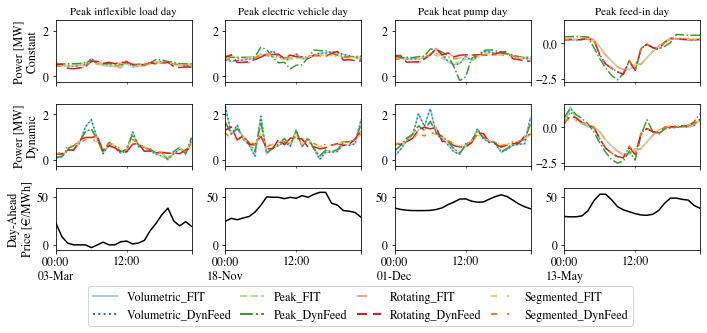

In [14]:
linestyles = ["solid", "dotted", "dashed", "dashdot", (0, (5, 10)), (5, (10,3)), 
              (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1)), (0, (5,1))]

res_dir = r""
prices_dir = r""
colors = sns.color_palette("Paired")
ts_dict = {
    "feed-in": pd.date_range(start="2019-05-13", periods=24, freq="1h"),
    "heat_pump": pd.date_range(start="2019-12-01", periods=24, freq="1h"),
    "load": pd.date_range(start="2019-03-03", periods=24, freq="1h"),
    "electric_vehicle": pd.date_range(start="2019-11-18", periods=24, freq="1h"),
    "debug": pd.date_range(start="2019-05-13", periods=24, freq="1h").append(
                    pd.date_range(start="2019-12-01", periods=24, freq="1h")).append(
                    pd.date_range(start="2019-03-03", periods=24, freq="1h")).append(
                    pd.date_range(start="2019-11-18", periods=24, freq="1h")),
    "full": pd.date_range(start="2019-01-01", periods=8760, freq="1h")
}

fig, axes = plt.subplots(3,4, figsize=(10, 4.))#, gridspec_kw={'width_ratios': [1.2, 1, 1, 1]}
axes_flat = [ax for ax in axes.flat]
tariff_idx = 0
for file_name_dynamic, file_name_constant in \
        zip(files_name_dynamic, files_name_constant):
    axes_idx = 0
    # add new time series
    ts_constant_orig = \
        pd.read_pickle(os.path.join(res_dir, file_name_constant)).divide(1000).sum(axis=1)
    ts_constant_orig.index = pd.date_range(start="2019-01-01", periods=8760, freq="1h")
    ts_dynamic_orig = \
        pd.read_pickle(os.path.join(res_dir, file_name_dynamic)).divide(1000).sum(axis=1)
    ts_dynamic_orig.index = pd.date_range(start="2019-01-01", periods=8760, freq="1h")
    
    for column_idx, mode in enumerate(["load", "electric_vehicle", "heat_pump", "feed-in"]):
        for row_idx, typ in enumerate(["constant", "dynamic"]):
            ax = axes[(row_idx, column_idx)]
            locals()[f"ts_{typ}_orig"][ts_dict[mode]].plot(ax=ax, color=colors[tariff_idx], linestyle=linestyles[tariff_idx])
            if row_idx == 0:
                ax.set_title("Peak " + mode.replace("_", " ") + " day",fontsize=11)
            ax.set_xticklabels([])
            ax.xaxis.set_minor_formatter("")
            ax.xaxis.set_minor_locator(MultipleLocator(12))
    tariff_idx += 1

for column_idx in range(len(axes[0])):
    if column_idx == 0:
        ax = axes[0, column_idx]
        ax.set_ylabel("Power [MW]\nConstant")
        ax = axes[1, column_idx]
        ax.set_ylabel("Power [MW]\nDynamic")
    ax = axes[1, column_idx]
    ylim1 = ax.get_ylim()
    ylim2 = axes[(0, column_idx)].get_ylim()
    ylim = (min(ylim1[0], ylim2[0]), max(ylim1[1], ylim2[1]))
    axes[(0, column_idx)].set_ylim(ylim)

for column_idx in range(3):
    for row_idx in range(2):
        axes[(row_idx, column_idx)].set_ylim(axes[(0,2)].get_ylim()[0], axes[(1,1)].get_ylim()[1])
plt.tight_layout()

# Create legend for the tariffs
labels = []
for idx, tariff in enumerate(["Volumetric_FIT", "Volumetric_DynFeed", "Peak_FIT", "Peak_DynFeed", "Rotating_FIT", "Rotating_DynFeed", 
             "Segmented_FIT", "Segmented_DynFeed"]):
    labels.append(Line2D([0], [0], color=colors[idx], lw=2, label=tariff, linestyle=linestyles[idx]))
leg = fig.legend(handles=labels,
           loc="lower center", ncol=4, bbox_to_anchor=(0.5,-0.175), columnspacing=0.75, handlelength=2)

# Use df_p["Deutschland/Luxemburg [€/kWh]"] instead of prices_tmp.csv
price_ts = df_p["Deutschland/Luxemburg [€/kWh]"]

for column_idx, mode in enumerate(["load", "electric_vehicle", "heat_pump", "feed-in"]):
    ax = axes[2, column_idx]
    price_ts.loc[ts_dict[mode]].plot(ax=ax, color="k", legend=False)
    if column_idx == 0:
        ax.set_ylabel("Day-Ahead\nPrice [€/MWh]")
    ax.set_ylim([-5,60])
    ax.xaxis.set_minor_locator(MultipleLocator(12))

axes[0,0].set_title("Peak inflexible load day", fontsize=11)
plt.subplots_adjust(wspace=0.25)


In [16]:

fig.savefig("profiles_with_prices1.pdf", bbox_inches='tight')